# Exploratory data analysis

In [21]:
# Libraries
import os
import json
import pandas as pd
import numpy as np
from PIL import Image
from glob import glob

import matplotlib.pyplot as plt
import matplotlib.patches as patches


import warnings
warnings.filterwarnings('ignore')

In [22]:
# check a file sample
dir = open("./data/anno_train/PE_074_2.json", "r", encoding="utf-8")
ann = json.load(dir)

In [23]:
# 객체에 대한 정보는 annotations에 들어있으며 coco format으로 되어 있다.
print('keys of json : ', ann.keys())
print('keys of images : ',ann["images"][0].keys())
print('keys of annotations : ',ann["annotations"][0].keys())

keys of json :  dict_keys(['images', 'categories', 'annotations', 'info', 'metainfo'])
keys of images :  dict_keys(['width', 'height', 'id', 'file_name'])
keys of annotations :  dict_keys(['id', 'image_id', 'category_id', 'metainfo_id', 'segmentation', 'bbox', 'ignore', 'iscrowd', 'area'])


In [24]:
# check train.json
dir = open("./data/train.json", "r", encoding="utf-8")
file = json.load(dir)

# 이상치 데이터 (PS_038_4646.json, PS_042_7482.json, PS_038_2948.jpg, PET_015_1358.jpg)를 삭제한 3996개 파일만 존재
print('num of train files : ',len(file['images']))
print('num of objects : ',len(file['annotations']))

num of train files :  3996
num of objects :  11633


In [25]:
# check categories 
df = pd.DataFrame(file["categories"])
df.index = df.index + 1

df

,id,name
1,1,pet
2,2,ps
3,3,pp
4,4,pe


In [26]:
# check images key
n_imgs = 3996

a = [x for x in file['images'][0].keys()]     
b = [file['images'][x] for x in range(n_imgs)]

df_imgs = pd.DataFrame(b, columns=a)
df_imgs.head(10)

,width,height,id,file_name
0,2024,2024,1,PS_038_1805.jpg
1,2048,2048,2,PP_058_6839.jpg
2,2024,2024,3,PS_038_4199.jpg
3,2024,2024,4,PET_017_3523.jpg
4,2048,2048,5,PP_058_7392.jpg
5,2048,2048,6,PP_054_2208.jpg
6,2024,2024,7,PS_042_4167.jpg
7,2024,2024,8,PET_021_2099.jpg
8,2024,2024,9,PET_014_5512.jpg
9,2024,2024,10,PET_030_4527.jpg


In [27]:
# 주어진 사진 파일의 크기가 모두 동일하지는 않으나 대체적으로 2024~2048로 일정하다.
# coco formating과정에서 id index가 1부터 3996까지 잘 들어가있다.
df_imgs.describe()

,width,height,id
count,3996.000000,3996.000000,3996.000000
mean,2037.033033,2037.033033,1998.500000
std,11.956949,11.956949,1153.690166
min,2024.000000,2024.000000,1.000000
25%,2024.000000,2024.000000,999.750000
50%,2048.000000,2048.000000,1998.500000
75%,2048.000000,2048.000000,2997.250000
max,2048.000000,2048.000000,3996.000000


In [28]:
# null data는 없다.
df_imgs.isnull().describe()

,width,height,id,file_name
count,3996,3996,3996,3996
unique,1,1,1,1
top,False,False,False,False
freq,3996,3996,3996,3996


In [29]:
# check annotations key
n_anno = 11633

a = [x for x in file['annotations'][0].keys()]     
b = [file['annotations'][x] for x in range(n_anno)]

df_anno = pd.DataFrame(b, columns=a)
df_anno.head(10)

,id,image_id,category_id,metainfo_id,segmentation,bbox,ignore,iscrowd,area
0,1,1,2,38,"[[374, 1090, 364, 1094, 354, 1097, 344, 1103, ...","[322, 1090, 222, 231]",0,0,47568.0
1,2,1,2,38,"[[910, 216, 902, 217, 894, 222, 886, 224, 878,...","[820, 216, 216, 222]",0,0,37244.5
2,3,1,2,38,"[[581, 794, 576, 795, 571, 798, 566, 799, 561,...","[520, 794, 140, 139]",0,0,15476.5
3,4,2,2,58,"[[1494, 803, 1475, 820, 1470, 845, 1469, 870, ...","[1356, 803, 427, 810]",0,0,222648.5
4,5,2,4,58,"[[929, 338, 903, 341, 877, 342, 851, 342, 825,...","[480, 338, 523, 795]",0,0,291924.0
5,6,3,2,38,"[[973, 682, 965, 683, 957, 683, 949, 684, 941,...","[838, 682, 246, 88]",0,0,20168.0
6,7,3,2,38,"[[428, 1056, 423, 1059, 418, 1061, 413, 1062, ...","[371, 1056, 151, 149]",0,0,17942.0
7,8,3,2,38,"[[457, 372, 452, 374, 447, 377, 442, 379, 437,...","[400, 372, 141, 146]",0,0,16092.5
8,9,4,1,17,"[[473, 974, 462, 977, 451, 984, 440, 986, 429,...","[343, 974, 293, 356]",0,0,73683.0
9,10,4,1,17,"[[884, 1314, 874, 1315, 864, 1319, 854, 1322, ...","[708, 1314, 299, 252]",0,0,51216.5


In [30]:
# 주어진 데이터에서 category_id가 44와 33인 값이 있다.
# mis labeling에 대한 수정이 필요하다.
df_anno['category_id'].unique()

array([ 2,  4,  1,  3, 44, 33])

In [31]:
df_anno.value_counts('category_id')

category_id
2     3180
1     3034
4     2957
3     2451
44       6
33       5
dtype: int64

In [32]:
df_anno[df_anno['category_id'] == 33]

,id,image_id,category_id,metainfo_id,segmentation,bbox,ignore,iscrowd,area
8462,8463,2913,33,50,"[[750, 1413, 742, 1415, 734, 1419, 726, 1421, ...","[657, 1413, 212, 212]",0,0,34641.5
8463,8464,2913,33,50,"[[997, 898, 983, 900, 969, 909, 955, 913, 941,...","[844, 898, 359, 398]",0,0,102099.0
8464,8465,2913,33,50,"[[1210, 1402, 1195, 1407, 1180, 1415, 1165, 14...","[1074, 1402, 391, 387]",0,0,120154.5
8760,8761,3013,33,56,"[[633, 1342, 606, 1344, 579, 1348, 552, 1354, ...","[494, 1342, 508, 618]",0,0,288163.0
8761,8762,3013,33,56,"[[1443, 1219, 1417, 1220, 1391, 1221, 1365, 12...","[1286, 1219, 493, 622]",0,0,288542.0


In [33]:
# annotations image_id와 images의 id와 같다는 점을 이용해서 파일을 찾는다.
print(df_imgs[df_imgs['id'] == 2913]['file_name'])
print(df_imgs[df_imgs['id'] == 3013]['file_name'])

2912    PP_050_4286.jpg
Name: file_name, dtype: object
3012    PP_056_7647.jpg
Name: file_name, dtype: object


In [34]:
df_anno[df_anno['category_id']== 44]

,id,image_id,category_id,metainfo_id,segmentation,bbox,ignore,iscrowd,area
6447,6448,2220,44,76,"[[1125, 413, 1118, 418, 1112, 425, 1110, 433, ...","[1065, 413, 209, 235]",0,0,33859.5
6448,6449,2220,44,76,"[[900, 1049, 893, 1055, 886, 1058, 881, 1064, ...","[814, 1049, 191, 219]",0,0,28230.0
6449,6450,2220,44,76,"[[1418, 881, 1410, 886, 1402, 888, 1395, 892, ...","[1324, 881, 186, 231]",0,0,28311.5
9755,9756,3354,44,101,"[[1543, 590, 1528, 592, 1513, 596, 1498, 598, ...","[1165, 590, 494, 239]",0,0,91216.0
9756,9757,3354,44,101,"[[888, 773, 870, 774, 852, 779, 835, 790, 817,...","[668, 773, 345, 548]",0,0,123310.0
9757,9758,3354,44,101,"[[1388, 1002, 1372, 1004, 1356, 1008, 1340, 10...","[1205, 1002, 506, 247]",0,0,101088.0


In [35]:
print(df_imgs[df_imgs['id'] == 2220]['file_name'])
print(df_imgs[df_imgs['id'] == 3354]['file_name'])

2219    PE_076_131.jpg
Name: file_name, dtype: object
3353    PE_101_30.jpg
Name: file_name, dtype: object


In [36]:
# 파일을 찾아서 직접 라벨링을 다시 수정해준다.

In [37]:
df_anno.describe()

,id,image_id,category_id,metainfo_id,ignore,iscrowd,area
count,11633.000000,11633.000000,11633.000000,11633.000000,11633.0,11633.0,11633.000000
mean,5817.000000,2001.108484,2.493252,47.750279,0.0,0.0,77648.408794
std,3358.302175,1154.608002,1.602518,26.037135,0.0,0.0,74433.896329
min,1.000000,1.000000,1.000000,2.000000,0.0,0.0,1.000000
25%,2909.000000,1001.000000,1.000000,30.000000,0.0,0.0,26806.500000
50%,5817.000000,2004.000000,2.000000,42.000000,0.0,0.0,57793.000000
75%,8725.000000,3000.000000,4.000000,74.000000,0.0,0.0,96066.000000
max,11633.000000,3996.000000,44.000000,103.000000,0.0,0.0,688235.000000


In [38]:
# null data는 없다.
df_anno.isnull().describe()

,id,image_id,category_id,metainfo_id,segmentation,bbox,ignore,iscrowd,area
count,11633,11633,11633,11633,11633,11633,11633,11633,11633
unique,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False
freq,11633,11633,11633,11633,11633,11633,11633,11633,11633


# Image sample check

In [53]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import os
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [54]:
annFile = "/home/kerrykim/PycharmProjects/6.plastic_segmentation/mmdetection/data/anno_train/PP_058_1258.json"
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [55]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

COCO categories: 
pet ps pp pe



In [56]:
catIds = coco.getCatIds(catNms=['top']);
imgIds = coco.getImgIds(catIds=catIds)

In [57]:
img = coco.loadImgs(imgIds[0])[0]
img

{'width': 2048, 'height': 2048, 'id': 1, 'file_name': 'PP_058_1258.jpg'}

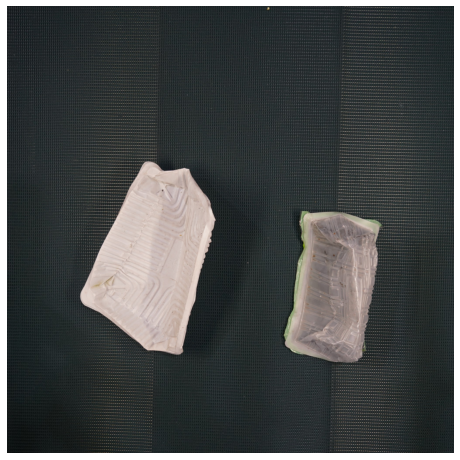

In [60]:
# load and display image
dir = "/home/kerrykim/PycharmProjects/6.plastic_segmentation/mmdetection/data/train/PP_058_1258.jpg"
I = io.imread(os.path.join(dir))
plt.axis('off')
plt.imshow(I)
plt.show()

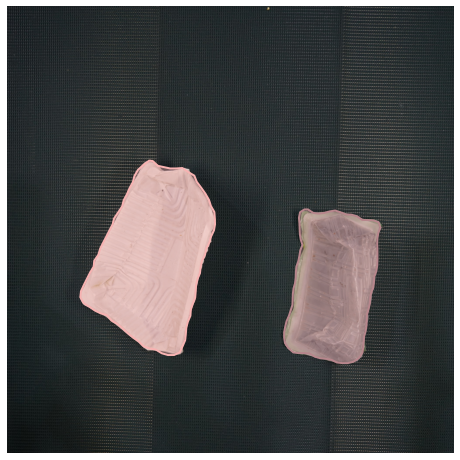

In [61]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)